# Relationship between Covid cases and Inflation Rate in US & Canada 

------------------------------------------------------------------------------------------------------------------------------------

### In this notebook we will make a comparison betwen Canada and US in terms of the relationship between the confirmed  Covid cases across 3 years (2019-2022) and the inflation rate by claculating the average , rolling Statistics , correlation  and creating an interactive visualizations 

In [30]:
# Initial imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
import seaborn as sns
import pygal  
from matplotlib.dates import MonthLocator, DateFormatter

# Data cleaning  
## In this section, we will  read the CSV file into DataFrame and perform any necessary data cleaning steps

Files 

` US&CA Dataset - US&CA Dataset.csv ` : contains the the covid cases across 3 years (2019-2022) for both US & CA as well as the inflation rate 


In [31]:
#import Combined Dataframe
combined_df=dfmake("US&CA Dataset.csv")
combined_df.head()

,Inflation_US,Inflation_CA,Covid_Cases_US,Covid_Cases_CA
Date,,,,
2021-12-01,7.1,1.9,1857993914,70660679
2021-11-01,6.8,1.9,1418982171,52864275
2021-10-01,6.2,2.0,1392031827,52220644
2021-09-01,5.4,2.2,1249406449,47080268
2021-08-01,5.3,2.4,1150163602,45460750


In [32]:
# Count nulls
combined_df.isnull().sum()

Inflation_US      0
Inflation_CA      0
Covid_Cases_US    0
Covid_Cases_CA    0
dtype: int64

In [33]:
# Check Data Types
combined_df.dtypes

Inflation_US      float64
Inflation_CA      float64
Covid_Cases_US      int64
Covid_Cases_CA      int64
dtype: object

# Conduct Quantitative Analysis


###  Plot  CA data using parallel_categories plot

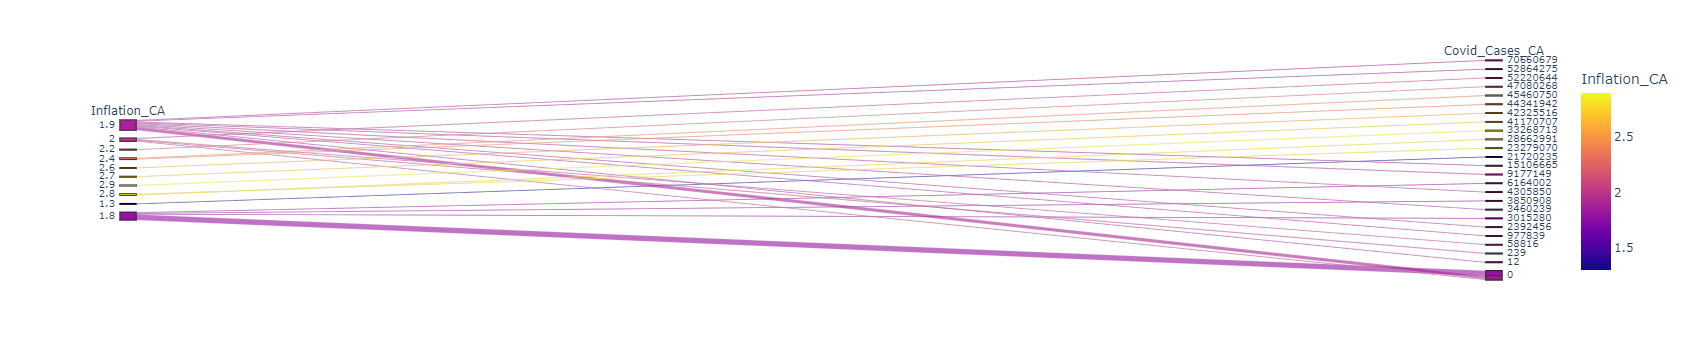

In [34]:
px.parallel_categories(
    combined_df,
    dimensions=["Inflation_CA","Covid_Cases_CA"],
    color="Inflation_CA",
)

###  Plot  US data using parallel_categories plot

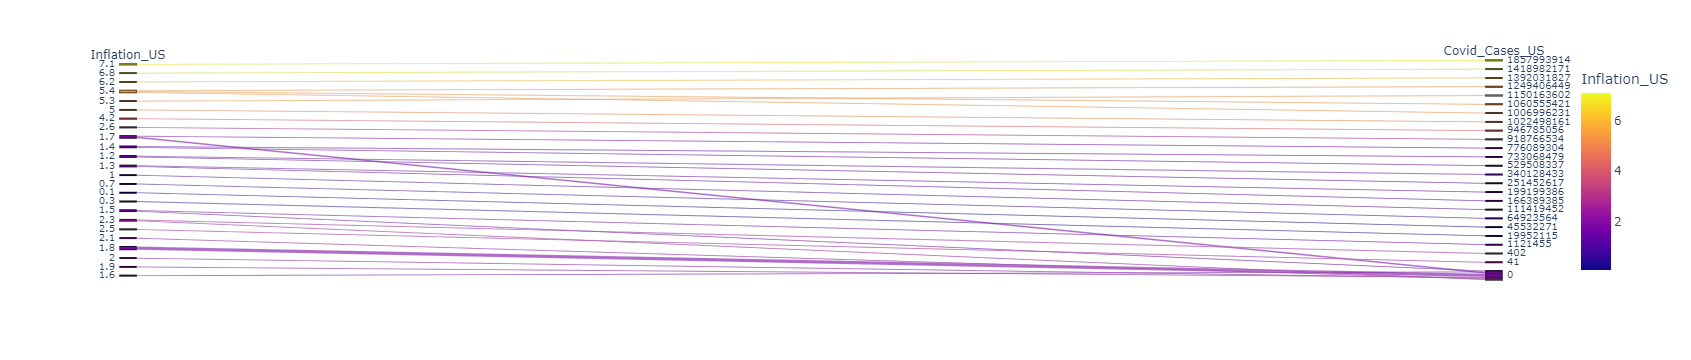

In [35]:
px.parallel_categories(
    combined_df,
    dimensions=["Inflation_US","Covid_Cases_US"],
    color="Inflation_US",
)

# Average covid cases in US and Canada 

In [36]:
# Calculate the average covid cases  for US and Canada 
avg_covid_cases=(combined_df[["Covid_Cases_US","Covid_Cases_CA"]]
         .groupby(combined_df.index).mean())
avg_covid_cases.head()


,Covid_Cases_US,Covid_Cases_CA
Date,,
2019-01-01,0.0,0.0
2019-02-01,0.0,0.0
2019-03-01,0.0,0.0
2019-04-01,0.0,0.0
2019-05-01,0.0,0.0


##  Visualize the data using bar charts and the Pandas plot function. 

In [37]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig=plt.figure()
    line_plot=data.plot.line(color=color) 
    line_plot.set_xlabel(xlabel)
    line_plot.set_ylabel(ylabel)
    line_plot.set_title(title)
    


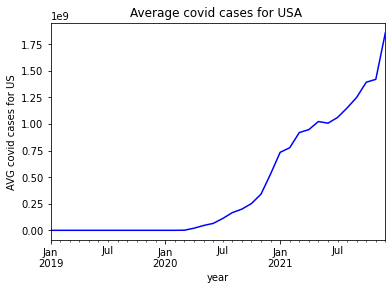

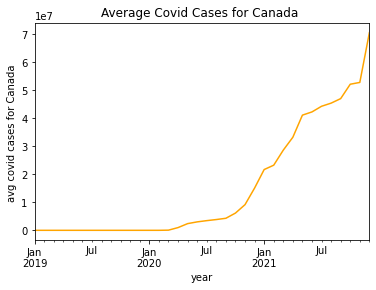

In [38]:
# Line chart for US covid cases 
create_line_chart(avg_covid_cases["Covid_Cases_US"],
                  title="Average covid cases for USA ",
                 ylabel="AVG covid cases for US", xlabel="year",color="blue")
# Line chart for CANADA COVID CASES
create_line_chart(avg_covid_cases["Covid_Cases_CA"],
                  title="Average Covid Cases for Canada ",
                 ylabel="avg covid cases for Canada ", xlabel="year",color="orange")

# Rolling Statistics

1. Calculate and plot the correlation  for all columns using heatmap and parallel coordinate plots 
2. Calculate and plot the 7 days rolling mean for all columns in data 
3. Calculate and plot the 7 days rolling standard deviation for inflation rate of US  and Canada
 



# Calculate and plot the correlation

In [39]:
# Calculate the correlation
correlation=combined_df.corr()

# Display the correlation matrix
correlation

,Inflation_US,Inflation_CA,Covid_Cases_US,Covid_Cases_CA
Inflation_US,1.000000,0.431838,0.873074,0.909902
Inflation_CA,0.431838,1.000000,0.486887,0.489899
Covid_Cases_US,0.873074,0.486887,1.000000,0.992986
Covid_Cases_CA,0.909902,0.489899,0.992986,1.000000


## use the **heatmap** to plot the correlation 

<AxesSubplot:>

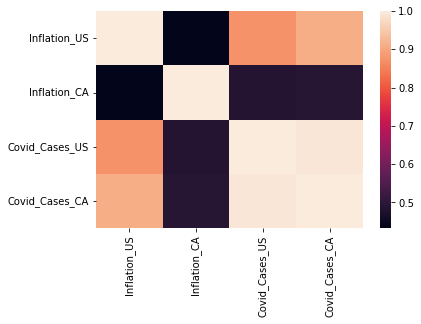

In [40]:
sns.heatmap(correlation) 

## Use the *parallel coordinate* to plot the correlation

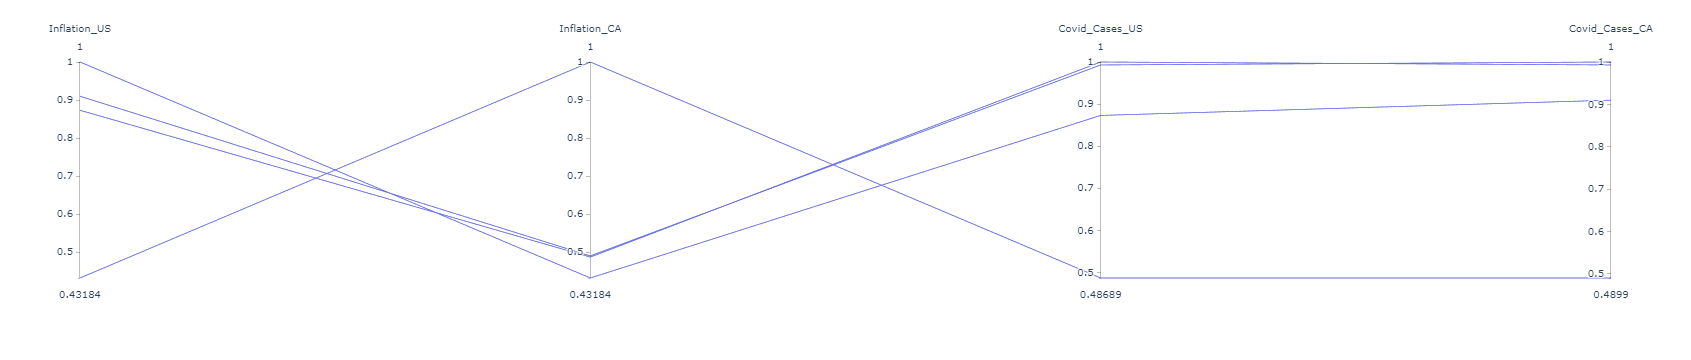

In [41]:
# Plot data using parallel_coordinates plot
px.parallel_coordinates(correlation)

# Rolling Statistics

In [42]:
#Calculate and plot the 7 days rolling mean for all columns in data 
inflation_rate=combined_df[["Inflation_US","Inflation_CA"]]
inflation_rate.head()

,Inflation_US,Inflation_CA
Date,,
2021-12-01,7.1,1.9
2021-11-01,6.8,1.9
2021-10-01,6.2,2.0
2021-09-01,5.4,2.2
2021-08-01,5.3,2.4


<AxesSubplot:xlabel='Date'>

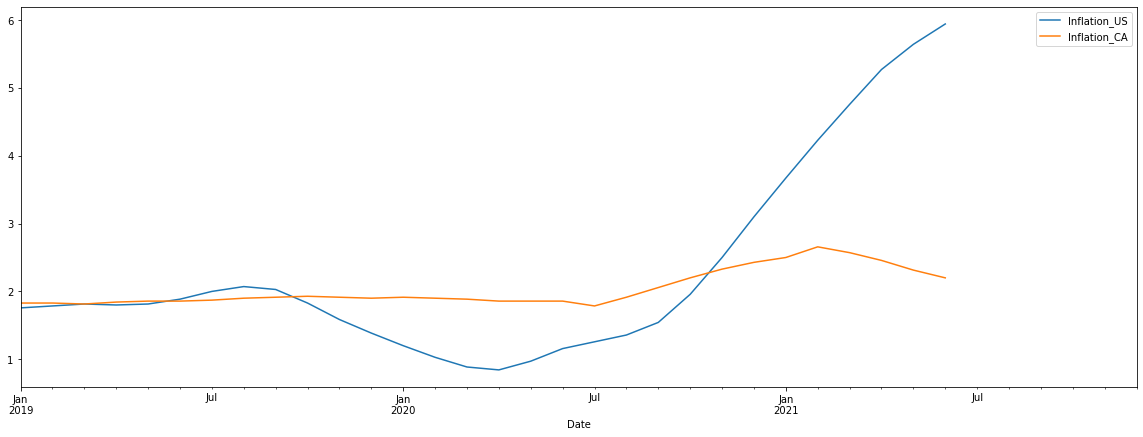

In [43]:
inflation_rate.rolling(window=7).mean().plot(figsize=(20,7))

## Calculate and plot the  7 days rolling standard deviation for inflation rate  and covid cases of US   


In [44]:
#Calculate and plot the rolling standard deviation for inflation rate of US  and covid cases us 
US_data=combined_df[["Inflation_US","Covid_Cases_US"]]
US_data.head()

,Inflation_US,Covid_Cases_US
Date,,
2021-12-01,7.1,1857993914
2021-11-01,6.8,1418982171
2021-10-01,6.2,1392031827
2021-09-01,5.4,1249406449
2021-08-01,5.3,1150163602


In [45]:
US_data.to_csv("inflation_rate& covid cases of US.csv")

<AxesSubplot:title={'center':'7 day rolling standard deviation for inflation rate and covid cases of US'}, xlabel='Date'>

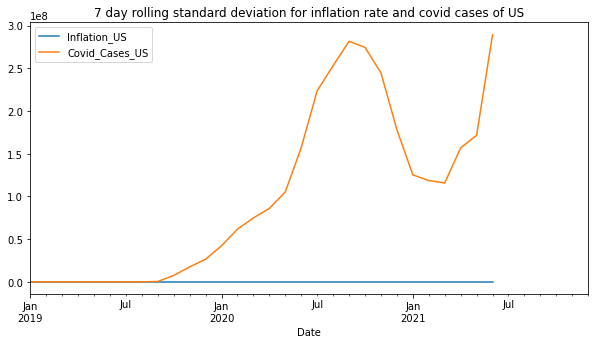

In [46]:
US_data.rolling(window=7).std().plot(figsize=(10,5), title= "7 day rolling standard deviation for inflation rate and covid cases of US")

## Using new libraby (Pygal)
for more inforamtion about the libraby see this link https://www.pygal.org/en/stable/

## Using Pygal library to plot the covid cases in US and Canada 

In [47]:
# Reading and type casting columns in our csv file.
combined_df= pd.read_csv("US&CA Dataset.csv",
                        dtype ={
                            "Date" : str,
                            "Inflation_US" :float,
                            "Covid_Cases_US":int,
                             "Covid_Cases_CA":int,
                              "Inflation_CA": float
                             })

In [48]:
# importing pygal library
import pygal
# we will append data in list 
#a = []
b = []
c = []
#d = []

# creating object
bar_chart = pygal.Bar()
bar_chart = pygal.HorizontalBar()
# adding range of months from 1 to 12
#bar_chart.x_labels = map(str, range(1,12))
for index,row in combined_df.iterrows():
    #a.append(row["Inflation_US"])
    b.append(row["Covid_Cases_US"])
    c.append(row["Covid_Cases_CA"])
    #d.append(row["Inflation_CA"])
   
# adding the     
#bar_chart.add("Inflation_US", a)
bar_chart.add("Covid_Cases_US", b)
bar_chart.add("Covid_Cases_CA",c)
#bar_chart.add("Inflation_CA",d)

# rendering  the file
bar_chart.render_to_file("bar_chart.svg")


the bar_chart file http://localhost:8888/files/Desktop/UOFT/Projects/Project-1/bar_chart.svg?_xsrf=2%7C217fb47a%7C22119a1299c65cbbdc3c1d1428cb5c78%7C1640541051 